In [ ]:
#Mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install wordcloud

In [ ]:
# set up notebook
# import all the indepenencies 
import os, glob
import seaborn as sns
path = "/content/drive/My Drive/Final_Project/"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# read the admissions table
df_adm = pd.read_csv('/content/drive/My Drive/Final_Project/ADMISSIONS.csv')
# read the notevents table
df_nevents = pd.read_csv('/content/drive/My Drive/Final_Project/NOTEEVENTS.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#to read the data from the admissions dataset
df_adm.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


Number of unique patiens: 46520


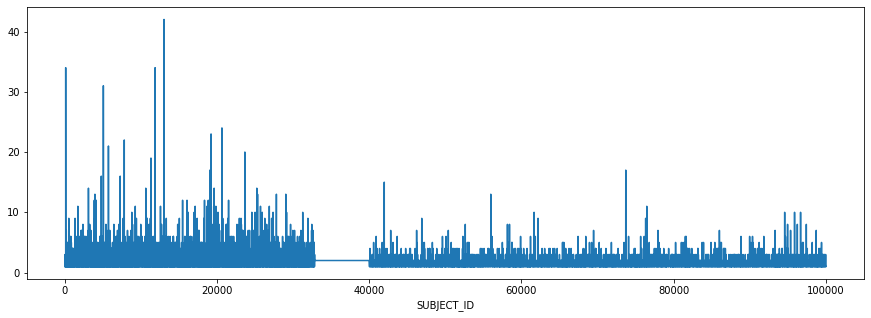

In [ ]:
#Print the count of hospital admission for each subject_id
print("Number of unique patiens:",  len(df_adm['SUBJECT_ID'].unique()))
patient_grp = df_adm.groupby('SUBJECT_ID')
patient_grp.size().plot(figsize=(15, 5))
plt.savefig('/content/sample_data/patient.png', format='png', dpi=600)

In [ ]:
#to drop the not so important columns from the admissions table
df_adm.drop('ROW_ID', axis=1, inplace=True)
df_adm.drop('ADMISSION_LOCATION', axis=1, inplace=True)
df_adm.drop('DISCHARGE_LOCATION', axis=1, inplace=True)
df_adm.drop('INSURANCE', axis=1, inplace=True)
df_adm.drop('LANGUAGE', axis=1, inplace=True)
df_adm.drop('RELIGION', axis=1, inplace=True)
df_adm.drop('MARITAL_STATUS', axis=1, inplace=True)
df_adm.drop('ETHNICITY', axis=1, inplace=True)
df_adm.drop('EDREGTIME', axis=1, inplace=True)
df_adm.drop('EDOUTTIME', axis=1, inplace=True)
df_adm.drop('DIAGNOSIS', axis=1, inplace=True)
df_adm.drop('HOSPITAL_EXPIRE_FLAG', axis=1, inplace=True)
df_adm.drop('HAS_CHARTEVENTS_DATA', axis=1, inplace=True)

In [ ]:
#to read only chosen important columns in admission table
df_adm.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY
1,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE
2,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY
3,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY
4,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY


In [ ]:
#to read data from notevents table 
df_nevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [ ]:
category_plot=df_nevents['CATEGORY'].value_counts()

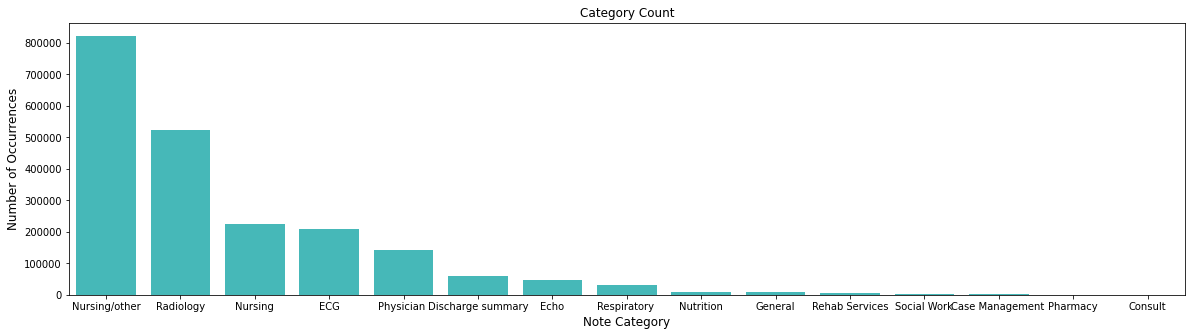

In [ ]:
#plot number of notes in each category
plt.figure(figsize=(20,5))
sns.barplot(category_plot.index, category_plot.values, alpha=0.8,color='c')
plt.title('Category Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Note Category', fontsize=12)
plt.show()

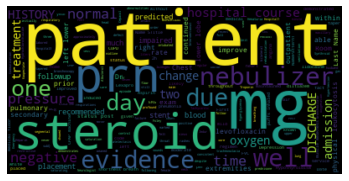

In [ ]:
#print word cloud for the first note text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Start with one review:
text = df_nevents['TEXT'][1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("/content/sample_data/wordcloud.png")

In [ ]:
# to remove not so important columns in notevents table
df_nevents.drop('ROW_ID', axis=1, inplace=True)
df_nevents.drop('CHARTDATE', axis=1, inplace=True)
df_nevents.drop('CHARTTIME', axis=1, inplace=True)
df_nevents.drop('STORETIME', axis=1, inplace=True)
df_nevents.drop('DESCRIPTION', axis=1, inplace=True)
df_nevents.drop('CGID', axis=1, inplace=True)
df_nevents.drop('ISERROR', axis=1, inplace=True)

In [ ]:
# read data from notevents table after removing some columns 
df_nevents.head()

,SUBJECT_ID,HADM_ID,CATEGORY,TEXT
0,22532,167853.0,Discharge summary,Admission Date: [**2151-7-16**] Dischar...
1,13702,107527.0,Discharge summary,Admission Date: [**2118-6-2**] Discharg...
2,13702,167118.0,Discharge summary,Admission Date: [**2119-5-4**] D...
3,13702,196489.0,Discharge summary,Admission Date: [**2124-7-21**] ...
4,26880,135453.0,Discharge summary,Admission Date: [**2162-3-3**] D...


In [ ]:
#merge the important fields from admissions and notevents tables keeping HAD_ID and SUBJECT_ID as primary key 
final = pd.merge(df_nevents, df_adm, on= ['HADM_ID','SUBJECT_ID'])

In [ ]:
#print data from the merged table
final.head()

,SUBJECT_ID,HADM_ID,CATEGORY,TEXT,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE
0,22532,167853.0,Discharge summary,Admission Date: [**2151-7-16**] Dischar...,2151-07-16 14:29:00,2151-08-04 19:10:00,NaN,EMERGENCY
1,22532,167853.0,Discharge summary,Admission Date: [**2151-7-16**] Dischar...,2151-07-16 14:29:00,2151-08-04 19:10:00,NaN,EMERGENCY
2,22532,167853.0,Echo,PATIENT/TEST INFORMATION:\nIndication: Aortic ...,2151-07-16 14:29:00,2151-08-04 19:10:00,NaN,EMERGENCY
3,22532,167853.0,Echo,PATIENT/TEST INFORMATION:\nIndication: Endocar...,2151-07-16 14:29:00,2151-08-04 19:10:00,NaN,EMERGENCY
4,22532,167853.0,ECG,Atrial fibrillation with a slow ventricular re...,2151-07-16 14:29:00,2151-08-04 19:10:00,NaN,EMERGENCY


In [ ]:
#print the list of columns in notevents table after removing unwanted columns 
list(df_nevents.columns)

['SUBJECT_ID', 'HADM_ID', 'CATEGORY', 'TEXT']

In [ ]:
#print the list of columns in admissions table after removing unwanted columns 
list(df_adm.columns)

['SUBJECT_ID',
 'HADM_ID',
 'ADMITTIME',
 'DISCHTIME',
 'DEATHTIME',
 'ADMISSION_TYPE']

In [ ]:
#print the list of columns in merged table after removing unwanted columns 
list(final.columns)

['SUBJECT_ID',
 'HADM_ID',
 'CATEGORY',
 'TEXT',
 'ADMITTIME',
 'DISCHTIME',
 'DEATHTIME',
 'ADMISSION_TYPE']

In [ ]:
#converting the merged table into csv file format
final.to_csv( "merged.csv")

In [ ]:
#print the dimensions of final dataset
final.shape

(1851344, 8)